 # TP6: Apprentissage profond(Deep learning)
 ## TP6.0 Le perceptron from scratch: Régression linéaire/logistique  
 Dans ce TP, nous explorerons le fonctionnement interne d'un neurone.


#### Travail demandé :
Objectif : démystifier la partie mathématiques dus réseaux de neurones
- Définir un perceptron simple
- Ecrire les fonctions qui permettet de faire tous les calculs 

On utilisera  deux datasets : le titanic et le housing. Un portant sur une classification l'aure sur une régression.
Les programmes sont identifques seuls le calcul de l'activation, la loss et les dw et db 
qui changent légérement. 
<span style="color:green">  L'architecture du réseau à un réel impact sur les résultats </span>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

## Neurone/ Perceptron  

### 1. Sélection des données 

### Dataset pour la classification

In [ ]:
# le dataset titanic 
import pandas as pd 
titanic = pd.read_csv('../../data/titanic.csv')

# On prend juste une partie du fichier.
titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age']]
#  on regrade les chance de Survived  en fonction des autres features.
X_features=['Pclass', 'Sex', 'Age']
titanic.dropna(axis=0, inplace=True)
titanic['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic.head()

y = titanic['Survived'] # récupérer la colonne survived et la mettre dans y

# récuperer le reste des données dans X utiliser la fonction titanic.drop ???, ??? )
X = titanic.drop('Survived', axis=1)
print(X.shape,y.shape)

### Dataset pour une régression A NE PS UTILISER

In [ ]:
# lecture du fichier texte.
data=pd.read_csv("../data/houses.txt", header=None)
data = data.rename(columns={0: 'Surf', 1: 'Nbpieces', 2: 'nbEtage', 3: 'Age', 4:'Prix'})
X= data.drop('Prix',  axis=1)
y=data['Prix']
data.head(3)


In [ ]:
# Lecture du dataset
import pandas as pd 
def load_data(n):
    data = pd.read_csv('../../data/train.csv')
    return data[0:n]


In [ ]:
data=load_data(-1)
data.dropna(axis=0, inplace=True)
y = data['smoking'] # récupérer la colonne survived et la mettre dans y
# récuperer le reste des données dans X utiliser la fonction titanic.drop ???, ??? )
X = data.drop('smoking', axis=1)

In [ ]:
data.head(3)

## 2. Préparation des données

#### Split des données 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train=np.reshape(y_train,(X_train.shape[0],1))

In [ ]:
print(X_train.shape,y_train.shape)

###   Normalisation des données
Rappel : Il est primordial de normaliser les données. Vous pourrez vérifier les performances de vos modèles avec et sans données normalisées

In [ ]:
## On peut utiliser une simple normalisation (X - moyenne)/ecart type)
# C'est une standardisation la même que StandardScaler de scikit learn
 
mean = X_train.mean()
std  = X_train.std()
X_train = (X_train - mean) / std

# Normalisation des données de test
X_test  = (X_test  - mean) / std

#display(X_train.describe().style.format("{0:.2f}").set_caption("After normalization :"))
display(X_train.head(3).style.format("{0:.2f}").set_caption("Few lines of the dataset :"))

## 3. Construction (définition) du modèle 
On construit un modèle de régression linéaire. 
<figure>
    <img src="../../images/perceptron.png"  style="width:440px;height:200px;" >
</figure>

$$ f_{\mathbf{w},b}(x^{(i)}) = \mathbf{w}\cdot x^{(i)} + b \tag{1}$$




### 3.1. Fonctions du modele
#### Petit rappel : on manipule directement les matrices et les vecteurs. Pas besoin de faire des boucles sur l'ensemble des valeurs, .... 
#### Cette question a déjà été traitée dans un des TP précédents (vectorisation).

### Initialisation des paramètres

In [ ]:
# Combien de paramètres 
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

### Calcul activation du modèle (Z et A)

In [ ]:
# Calcul activation du modèle Z et A 
def model(X, W, b):
    Z = X @ W + b
    # sigmoide pour la classification
    A = 1 / (1 + np.exp(-Z))
    
    # identité pour la régression 
    #A = Z
    return A

### Calcul de la Loss

In [ ]:
# Calcler la Loss (la MSE
def log_loss(A, y):
    # MSE (régression)
    #return 1/2*len(y) * np.sum((y - A)**2)
  
    #log logistic (classification
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A)) 
    

### Calcul des gradients

In [ ]:
def gradients(A, X, y):
    lambda_ = 0.5
    e   = A - y     
    dW = 1 / len(y) * (X.T @ e) 
    db = 1 / len(y) * np.sum(e)
    
    # régularisation
    #dW = dW + (lambda_/len(y)) * W
    return dW, db

### Modifier w et b

In [ ]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

### Prediction 

In [ ]:
def predict(X, W, b):
    A = model(X, W, b)
    return A >= 0.5 # classification
    #return A # regression

### Définition du neurone et de ses fonctions : mettre tout dans une même fonction
- initialiser les paramètres du modèle
- définir les hyperparamètres : learning_rate, nombre_d'itérations
- commencer les traitements (dans une boucle) 
    - appel da la fonction qui calcule l'activation
    - caculer l'erreur (pour la visualiser) 
    - calculer les gradients
    - effectuer les modification des paramètres w et b
    - réitérer
- une fois le modèle appris
    - commencer la prédiction
    - visualiser la Loss et les performances


In [165]:
def perceptron(X, y, learning_rate, n_iter):
    # initialisation W, b
    W, b = initialisation(X)
    Loss = []
    # itérer l'apprentissage 
    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)      
        W, b = update(dW, db, W, b, learning_rate)
        # Pour l question relative au learning_rate,
        if i%100==0:
            learning_rate =(learning_rate/np.sqrt(i+1))
    return (W, b, Loss)
    

In [166]:
learning_rate = 0.1  # loss dynamique commencer à 1
n_iter = 1000
err=0.1
#W, b , Loss = perceptron(X_train, y_train, learning_rate,n_iter )
W, b , Loss_dy = perceptron(X_train, y_train, learning_rate,n_iter )

#### Calcul des prédictions et les performances appropriées (Accuracy ou r2_score)

In [167]:
from sklearn.metrics import accuracy_score,  f1_score, r2_score
## Accuracy pour la classification
y_pred_train=predict(X_train, W, b)
y_pred = predict(X_test, W, b)
print("Accuracy train", accuracy_score(y_train, y_pred_train), "Accuracy Test", accuracy_score(y_test, y_pred))


Accuracy train 0.7875751503006012 Accuracy Test 0.7627906976744186


### Visualiser la Loss

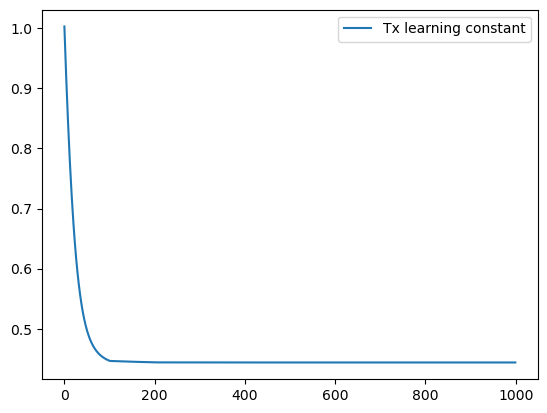

In [168]:
plt.plot(Loss, label="Tx learning constant")
plt.plot(Loss_dy, label="x learning dynamique")
plt.legend()
plt.show()

## Questions
L'objectif dec cette partie est d'évaluer l'impact du taux d'apprentissage (learning_rate). 
- 1. Reprendre l'algorithme d'apprentissage, mettre en place un learning_rate dynamique, qui est mis à jour chaque fois que l'iteration, $t$ (qui correspond à l'indice $i$ dans le programme principal) prend une valeur multiple de $10$, $100$, vous pourrez utiliser la forme suivante : $\alpha=\frac{\alpha}{\sqrt(t+1)}$, t étant l'itération. 
- 2. Comparer les courbes des Loss obtenues pour chacun de ces cas (learning_rate constant et learning_rate dynamique avec $t$ aleur multiple de $10$, $100$).
- 3. On souhaite arrêter l'apprentissage soit quand l'erreur est inférieure à 0.1 ou quand on atteint le nombre diitérations max, rajouter cette contrainte à l'algortime   
- 4. Refaire l'exercice en prenant les données du fichier smoking (du contôle). Le dataset est dans la cellule ci dessous. 


In [ ]:
# Lecture du dataset n permet de limiter le nombre de lignes à lire
# Pour faciliter les tests
import pandas as pd 
def load_data(n):
    data = pd.read_csv('../../data/train.csv')
    return data[0:n]

# le -1 du load_data(-1) veut dire on prend toutes les lignes 
data=load_data(-1)
data.dropna(axis=0, inplace=True)
y = data['smoking'] # récupérer la colonne survived et la mettre dans y
# récuperer le reste des données dans X utiliser la fonction titanic.drop ???, ??? )
X = data.drop('smoking', axis=1)

In [169]:
## rajouter ces deux lignes à la fonction Perceptro
#if i%100==0:
#            learning_rate =(learning_rate/np.sqrt(i+1))

# elles sont déjà rajoutées dans le programme